In [6]:
from utils.physics.sound_model.cartesian_sound_model import HomogeneousCartesianSoundModel as SoundModel
from utils.physics.sound_model.spherical_sound_model import HomogeneousSphericalSoundModel as SoundModel
from utils.physics.sound_model.spherical_sound_model import GridSphericalSoundModel as GridSoundModel

from utils.physics.geodesic.distance import distance_point_point
import datetime
import numpy as np
from matplotlib import pyplot as plt

/home/plerolland/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# propagation time

pos_1 = [-25, 10]  # lat, lon format (in degrees)
pos_2 = [-30, 15]

sound_model = SoundModel(sound_speed=1480)
sound_model = GridSoundModel([f"../../../data/sound_model/min-velocities_month-{i:02d}.nc" for i in range(1,13)])


propagation_time = sound_model.get_sound_travel_time(pos_1, pos_2, datetime.datetime.now())
print(f"Propagation time between {pos_1} and {pos_2}: {propagation_time:.2f}s")
print(f"(Distance is {distance_point_point(pos_1, pos_2)/1_000:.2f} km)")

Propagation time between [-25, 10] and [-30, 15]: 502.81s
(Distance is 742.13 km)


In [12]:
# location
detection_pos_1 = [5, 0]
detection_pos_2 = [-5, 0]
detection_pos_3 = [0, 5]
detection_pos_4 = [0, -5]
detection_positions = [detection_pos_1, detection_pos_2, detection_pos_3, detection_pos_4]

sound_model = SoundModel(sound_speed=1820)

detection_time_1 = datetime.datetime(2020, 1, 1, 0, 0, 0)
detection_time_2 = detection_time_1
detection_time_3 = detection_time_1
detection_time_4 = detection_time_1
detection_times = [detection_time_1, detection_time_2, detection_time_3, detection_time_4]

inversion = sound_model.localize_common_source(detection_positions, detection_times)
print(f"Found source position {inversion.x[1:]} with an emission {inversion.x[0]:.2f} s before the first detection. Cost was {inversion.cost:.2f}.")

Found source position [0. 0.] with an emission -305.82 s before the first detection. Cost was 0.00.



Monte-Carlo estimation...: 100%|██████████| 1000/1000 [00:11<00:00, 85.21it/s][A


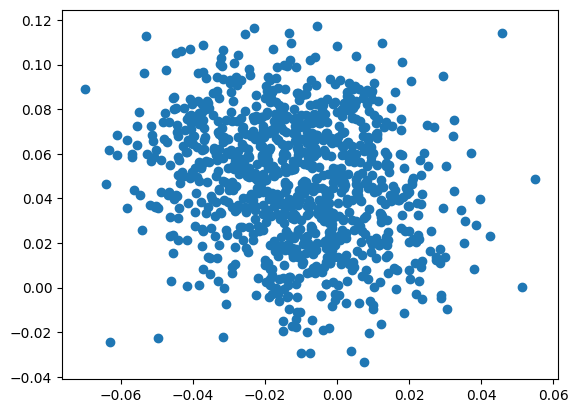

In [16]:
# MC uncertainty estimate
pos = sound_model.MC_error_estimation(1000, 1.5, 0.5, detection_positions, detection_times)
pos = np.array(pos)
plt.scatter(pos[:,2], pos[:,1])